Exercise: **CNN Implementation**  using  **MNIST Dataset**



In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [10]:
#MNIST Dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [11]:
#Shape data for CNN
#Normalization

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [13]:
#Model

model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
#Model Training
model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9825 - loss: 0.0563 - val_accuracy: 0.9875 - val_loss: 0.0360
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.9887 - loss: 0.0379 - val_accuracy: 0.9896 - val_loss: 0.0350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9922 - loss: 0.0265 - val_accuracy: 0.9914 - val_loss: 0.0269
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9940 - loss: 0.0202 - val_accuracy: 0.9917 - val_loss: 0.0294
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9947 - loss: 0.0156 - val_accuracy: 0.9890 - val_loss: 0.0396


In [21]:
#Model Eval

Y_predicted = model.predict(X_test)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [23]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)

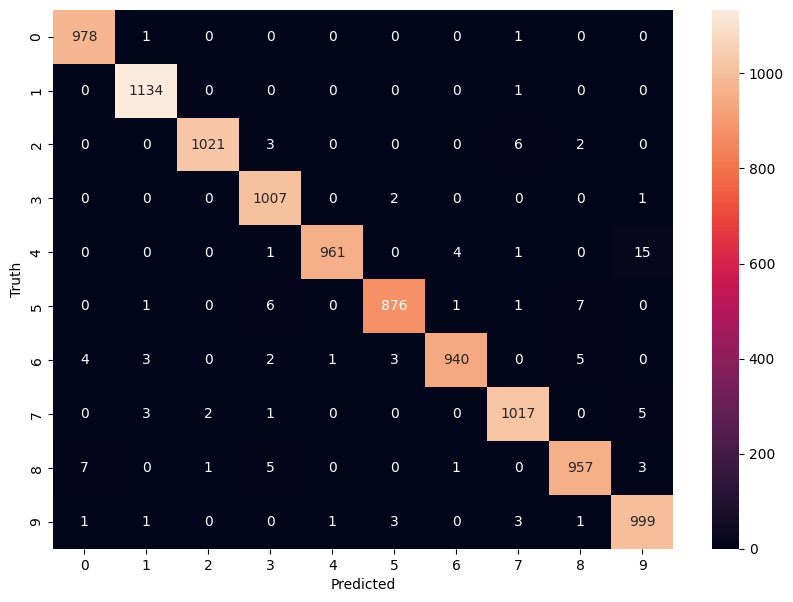

In [24]:
#Plot CM

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()